<a href="https://colab.research.google.com/github/TarunTejaYaram/Openl3---classification/blob/master/fen%C3%AAtre_texture_l3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet CENSE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!cp /content/drive/My\ Drive/project/scenes_stereo.zip .
!unzip scenes_stereo.zip

Archive:  scenes_stereo.zip
   creating: scenes_stereo/
  inflating: scenes_stereo/bus01.wav  
  inflating: scenes_stereo/bus02.wav  
  inflating: scenes_stereo/bus03.wav  
  inflating: scenes_stereo/bus04.wav  
  inflating: scenes_stereo/bus05.wav  
  inflating: scenes_stereo/bus06.wav  
  inflating: scenes_stereo/bus07.wav  
  inflating: scenes_stereo/bus08.wav  
  inflating: scenes_stereo/bus09.wav  
  inflating: scenes_stereo/bus10.wav  
  inflating: scenes_stereo/busystreet01.wav  
  inflating: scenes_stereo/busystreet02.wav  
  inflating: scenes_stereo/busystreet03.wav  
  inflating: scenes_stereo/busystreet04.wav  
  inflating: scenes_stereo/busystreet05.wav  
  inflating: scenes_stereo/busystreet06.wav  
  inflating: scenes_stereo/busystreet07.wav  
  inflating: scenes_stereo/busystreet08.wav  
  inflating: scenes_stereo/busystreet09.wav  
  inflating: scenes_stereo/busystreet10.wav  
  inflating: scenes_stereo/office01.wav  
  inflating: scenes_stereo/office02.wav  
  inflatin

In [3]:
!pip3 uninstall tensorflow-gpu -y
!pip3 uninstall tensorflow -y
!pip install "tensorflow-gpu<1.14"
!pip3 install openl3
!pip3 install soundfile

Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 345.0MB 39kB/s 
     |████████████████████████████████| 3.2MB 33.1MB/s 
     |████████████████████████████████| 368kB 39.7MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
     |████████████████████████████████| 337kB 10.1MB/s 
     |████████████████████████████████| 389kB 22.6MB/s 
     |████████████████████████████████| 25.4MB 120kB/s 
     |████████████████████████████████| 3.3MB 40.8MB/s 
     |████████████████████████████████| 26.9MB 113kB/s 
  Created wheel for openl3: filename=openl3-0.3.1-py2.py3-none-any.whl size=249323247 sha256=56333c3320640c2b1a7efac1eaf21299a8f7a74d9a2c1732e7784b30deee1d4f
  Stored in directory: /

# New Section

In [4]:
import os
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import openl3
import soundfile as sf
import tensorflow as tf

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

## 1. Preprocessing

In [5]:
#set directory for source files 
data_dir = './scenes_stereo/'
audio_files = glob(data_dir + '*.wav')
print('file size:',len(audio_files))

file size: 100


In [6]:
data_list = glob(data_dir+"/*")
data_audio = []
data_sr = []
data_emb = []
data_ts = []
print('datalist file:',data_list)

all_labels = {'bus','busystreet','office','openairmarket','park','quietstreet','restaurant','supermarket','tube','tubestation'}

for name in ['bus','busystreet','office','openairmarket','park','quietstreet','restaurant','supermarket','tube','tubestation']:
    for k in range(1,10):
      audio, sr = sf.read(data_dir+name + '0'+str(k)+'.wav')
      emb, ts = openl3.get_audio_embedding(audio, sr, content_type="env", input_repr="mel256", embedding_size=512)
      data_sr.append(sr)
      data_emb.append(emb)
      data_ts.append(ts)

    audio, sr = sf.read(data_dir+name + '10.wav')
    emb, ts = openl3.get_audio_embedding(audio, sr, content_type="env", input_repr="mel256", embedding_size=512)
    data_sr.append(sr)
    data_emb.append(emb)
    data_ts.append(ts)

datalist file: ['./scenes_stereo/bus04.wav', './scenes_stereo/tube09.wav', './scenes_stereo/office10.wav', './scenes_stereo/restaurant01.wav', './scenes_stereo/office09.wav', './scenes_stereo/busystreet07.wav', './scenes_stereo/busystreet10.wav', './scenes_stereo/busystreet08.wav', './scenes_stereo/tubestation03.wav', './scenes_stereo/tubestation02.wav', './scenes_stereo/restaurant07.wav', './scenes_stereo/tube06.wav', './scenes_stereo/busystreet03.wav', './scenes_stereo/openairmarket10.wav', './scenes_stereo/tubestation07.wav', './scenes_stereo/busystreet09.wav', './scenes_stereo/quietstreet01.wav', './scenes_stereo/quietstreet07.wav', './scenes_stereo/tube05.wav', './scenes_stereo/bus08.wav', './scenes_stereo/supermarket06.wav', './scenes_stereo/tubestation04.wav', './scenes_stereo/restaurant04.wav', './scenes_stereo/supermarket04.wav', './scenes_stereo/restaurant02.wav', './scenes_stereo/tubestation08.wav', './scenes_stereo/quietstreet08.wav', './scenes_stereo/supermarket08.wav', '.

In [10]:
 
#data_sr 
#data_emb 
data_ts

[array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
        11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
        12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
        13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
        14.3, 14.4, 14.5, 14.6, 14.7, 

In [16]:
print (data_emb[1:100])
import pickle

with open("data_emb.txt", "wb") as fp:   
  pickle.dump(data, fp)

[array([[2.329384 , 3.5418863, 3.2499628, ..., 2.7266357, 2.2812407,
        1.8282691],
       [2.2690778, 3.507921 , 3.2318323, ..., 2.6902492, 2.2340748,
        1.8857213],
       [2.3587563, 3.4597642, 3.2734666, ..., 2.717121 , 2.249037 ,
        1.929352 ],
       ...,
       [1.8018982, 3.083575 , 2.8921878, ..., 2.3717127, 2.601081 ,
        2.3710454],
       [1.7523658, 3.0978448, 2.8226538, ..., 2.5834727, 2.3466055,
        2.1406305],
       [1.7448696, 3.0544868, 2.7987409, ..., 2.5179536, 2.4362795,
        2.0473368]], dtype=float32), array([[2.1365883, 2.2423105, 3.2558322, ..., 2.8066235, 1.6735225,
        2.146425 ],
       [2.1359558, 2.2898011, 3.2373803, ..., 2.8010564, 1.7151287,
        2.592492 ],
       [2.1779034, 2.3148787, 3.2833958, ..., 2.8172178, 1.7235264,
        2.770443 ],
       ...,
       [2.5030105, 2.3165107, 2.638216 , ..., 2.8952866, 2.1219106,
        3.1199229],
       [2.297699 , 2.4421377, 2.534489 , ..., 2.8752904, 2.1348548,
        3.

NameError: ignored

In [0]:
import numpy as np
#np.reshape('data.npz', data)
np.savez('data_emb.npz', data_emb=data_emb)

In [19]:
data_emb[0].shape

(296, 512)

In [20]:
np.mean(data_emb[0],axis=1).shape

(296,)

In [0]:
labels = [] # Labels des échantillons
for k in range(10):
    labels = labels+[k]*10
dict_labels = {'bus':0,'busystreet':1,'office':2,'openairmarket':3,'park':4,'quietstreet':5,'restaurant':6,'supermarket':7,'tube':8,'tubestation':9} 

In [0]:
def wind_texture(M,wsize):
    
    n,m = M.shape
    nwind = m//wsize
    
    W = np.zeros((n,nwind))
    
    for i in range (nwind):
        W[:,i] = np.mean(M[:,i*wsize:(i+1)*wsize],axis=1)
    
    return(W)

In [0]:
def dist_wind_approximate(A,B,wsize):
    
    x = wind_texture(A,wsize)
    y = wind_texture(B,wsize)
    
    n,m = np.shape(x)
    distxy = np.zeros((m,1))
    
    for k in range(m):
        distxy[k] = np.linalg.norm(x[:,k]-y[:,k])

    return min(distxy)

In [0]:
def p_at_k(mat_dist,K=5,labels=labels):
    p5 = np.zeros(100)
    for k in range(100):
        dist = mat_dist[k,:]
        distsort = np.argsort(np.ravel(dist))

        p5[k] = np.sum([labels[distsort[i]]==labels[k] for i in range(1,K+1)])/K
    return(np.mean(p5))

In [0]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precision = np.zeros((len(seq_size),9))
num = 0


for n, windsize in enumerate(seq_size):
    for i in range(100):
        for j in range(i,100):
            mat_dist[n, i,j] = dist_wind_approximate(data_emb[i],data_emb[j],windsize)
            mat_dist[n, j,i] = mat_dist[n, i,j]

    for k in range(1,10):
        precision[n,k-1] = p_at_k(mat_dist[n, :, :],k)

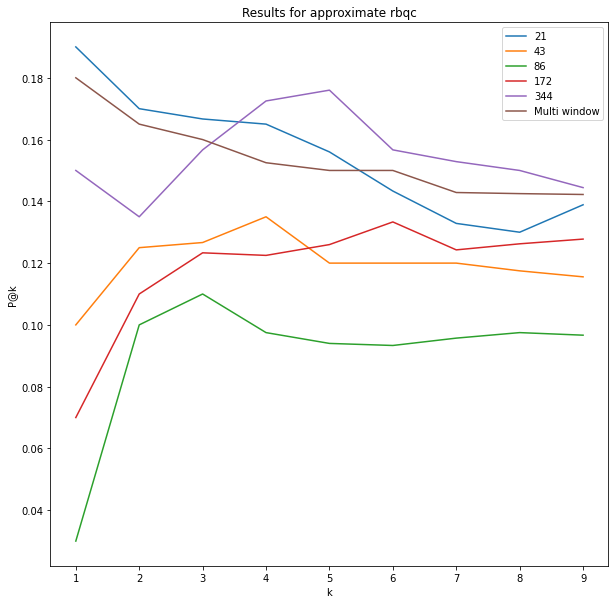

In [27]:
precisionMult = np.zeros(9)
for k in range(1,10):
    precisionMult[k-1] = p_at_k(mat_dist.sum(axis=0),k)

plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.title('Results for approximate rbqc')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [0]:
def dist_wind(A,B,wsize):
    
    x = wind_texture(A,wsize)
    y = wind_texture(B,wsize)
    
    n,m = np.shape(x)
    distxy = np.float('Inf')
    
    for k in range(m):
        distxy = min(distxy, min(np.linalg.norm(np.transpose(y)-x[:,k], axis=1)))

    return distxy

In [0]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precision = np.zeros((len(seq_size),9))
num = 0

for n, windsize in enumerate(seq_size):
    for i in range(100):
        for j in range(i,100):
            mat_dist[n, i,j] = dist_wind(data_emb[i],data_emb[j],windsize)
            mat_dist[n, j,i] = mat_dist[n, i,j]

    for k in range(1,10):
        precision[n,k-1] = p_at_k(mat_dist[n, :, :],k)

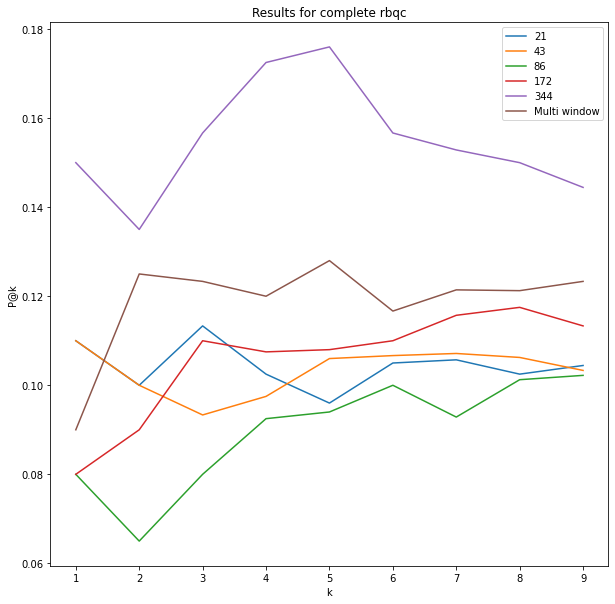

In [32]:
precisionMult = np.zeros(9)
for k in range(1,10):
    precisionMult[k-1] = p_at_k(mat_dist.sum(axis=0),k)

plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.title('Results for complete rbqc')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()